In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Least Squares Minimization

## The Problem

We propose a linear functional relation between 2 measurable variables, $x$ and $y$:

$$
y = a_0 + a_1 x
$$

where $a_0$ and $a_1$ are **unknown** constants. We wish to find these constants.

## The Solution

To find these unknown coefficients in practice we measure many $x$, $y$ pairs (assuming the measurements display some sort of dispersion). We now have a set of measured $(x_i, y_i)$ pairs for $i = 1, 2, 3, \dots, N$.

If we assume that the $x_i$ are free of error, we can introduce error terms <font color = "red"> $\epsilon_i$ </font> to the $y_i$ data to make up for the dispersion of the data (i.e. that it doesn't follow the linear relation exactly).

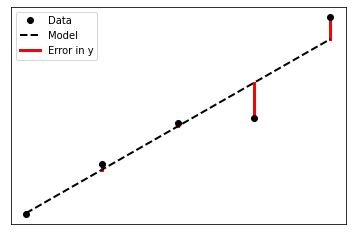

In [2]:
a0, a1 = 2, 1

sigma = 1.5

lw = 2

x = np.linspace(0, 10, 5)
y = np.random.normal(a0 + x*a1, sigma)

x_true = np.linspace(0, 10, 2)
y_true = a0 + a1*x_true

fig_lsm_err, ax = plt.subplots()

#Plotting error bars
for xx,yy in zip(x,y):
    ax.plot([xx,xx], [yy, a0 + a1*xx], 'r', 
            linewidth = 1.5*lw)

ax.plot(x, y, 'ko', label = 'Data')
ax.plot(x_true, y_true, 'k--', linewidth = lw, 
        label = 'Model')

ax.plot([], 'r', linewidth = 1.5*lw, label = 'Error in y')
    
ax.set_xticks([])
ax.set_yticks([])
ax.legend()
# plt.savefig('least_sq_error.png')

plt.show()

With this error term, the relation between our data points can be represented as:

<!--- center tag doesn't work with math -->
$y_i +$ <font color = "red"> $\epsilon_i$ </font> $= a_0 + a_1 x_i$


Note that, at this point the error terms we have introduced are unknown to us. They represent the difference between the measured $y_i$ values and the expected values if we plugged $x_i$ into our relation (for which we have yet to determine $a_0$ and $a_1$). The error terms can be seen as a means to an end and will soon be done away with.

Now, we need some sort of metric to tell us how much error we have. We can use the sum of the errors squared for this:

$$
S = \sum_{i=1}^{N} \epsilon_i^2
$$

We use the squares of the error as it is the magnitude of the errors we are concerned about, and with the errors ranging between positive and negative values, will end up canceling each other out (these are illustrated as points above and below the lines in the figure above).

We can use the relation between our data points to replace the $\epsilon_i^2$:

$$
S = \sum_{i=1}^{N} (a_0 + a_1 x_i - y_i)^2
$$

Now, we want our choice of $a_0$ and $a_1$ to give us the least amount of error possible, or rather to give us the minimum value of $S$. To achieve this we minimize $S$ with respect to $a_0$:

\begin{align*}
 \frac{\partial S}{\partial a_0} = 2\sum_{i = 1}^{N} (a_0 + a_1 x_i - y_i) &= 0\\
 \therefore a_0 N + a_1 \sum_{i = 1}^{N} x_i - \sum_{i = 1}^{N} y_i        &= 0\\
 \therefore a_0 + a_1 \langle x \rangle                                    &= \langle y \rangle \\
\end{align*}

and $a_1$:

\begin{align*}
 \frac{\partial S}{\partial a_1} = 2\sum_{i = 1}^{N} (a_0 + a_1 x_i - y_i)x_i                &= 0\\
 \therefore a_0 \sum_{i = 1}^{N} x_i + a_1 \sum_{i = 1}^{N} x_i^2 - \sum_{i = 1}^{N} x_i y_i &= 0\\
 a_0 \langle x \rangle + a_1 \langle x^2 \rangle                                             &= \langle xy \rangle\\
\end{align*}


To solve this system of equations we could use a matrix equation and let the computer determine the solution to that numerically, but with only two equations and unknowns, an analytic solution is easy enough to find:

$$
\begin{align*}
a_1 &= \frac{\langle xy \rangle - \langle x \rangle\langle y \rangle}{\langle x^2 \rangle - \langle x \rangle^2}\\
a_0 &= \langle y \rangle - a_1 \langle x \rangle\\
\end{align*}
$$

## Variance of $y$

If we assume that the $y_i$ data points are distributed around the "true" $y$ values for the given $x_i$ by a Gaussian distribution with constant variance, we can calculate the variance of $y$ as:

$$
\begin{align*}
\sigma_y^2  & = \frac{1}{N}\sum_{i=1}^N \epsilon_i^2\\
& = \frac{1}{N} \sum_{i=1}^N (a_0 + a_1 x_i - y_i)^2\\
\end{align*}
$$

<div class="worked-example">
    <h5 class="worked-example-title"><b>Worked Example</b> - Cepheid Variables</h5>

For this worked example we will use data from Cepheid variables. These are pulsating stars with their luminosity (or magnitude $M$) related to the period ($P$) of their pulsations:

$$
M = a_0 + a_1 \log P
$$

Note that the relation above is can be made more accurate by including the color or temperature of the  star, which we shall use later in the chapter.

As this relation is consistent across all specimens, these stars can be used as a standard candle for measuring distances, all that is needed are measurements from stars with known distances from Earth to determine $a_0$ and $a_1$.

The standard is to measure Cepheids in the Large Magellanic Cloud, whose distance is known. A few of these measurements can be found in the data file 'cepheid_data.csv' provided on Vula (Resources/Exercises/Data/exercise10.1/) or on [GitHub](https://raw.githubusercontent.com/maystey/uct_nassp_cm2021/master/book/content/numerical-methods/regression/data/cepheid_data.csv). The data file contains measurements of:

- $\log P$
- $M$
- $B - V$ (color, not using yet)

We will determine $a_0$ and $a_1$ under 2 different assumptions:

1. The error in the data is associated with $M$
2. The error in the data is associated with $\log P$ (this will require us to re-arrange things)


**Solution:**

You are encouraged to attempt this yourself before continuing.

We start by reading in the file. We will read the data into a 2 arrays. This can be achieved using the standard library as in the page **{doc}`Python Standard Library/File IO/Data Files<../../standard-library/file-io/data>`**, or using `numpy.loadtxt()` (documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)). We shall use the latter as it is far more convenient:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

logP, M, color = np.loadtxt('./data/cepheid_data.csv', delimiter = ',', skiprows = 1, unpack = True)

The keyword arguments used above are:

- `delimeter`: the string used to separate the data columns
- `skiprows`: the number of rows to skip from the data file (in this case the header)
- `unpack`: this makes `loadtxt` return each column in the data file as arrays, as apposed to the default of a single 2D array.

As we will be performing 2 minimizations, we will define a function to determine  $a_0$ and $a_1$, and $\sigma_y$:

In [4]:
def least_squares(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    #Note that the expectation values can be calculated using the mean function
    expect_xy = np.mean(x*y)
    expect_xx = np.mean(x*x)
    
    a1 = (expect_xy - mean_x*mean_y)/(expect_xx - mean_x*mean_x)
    
    return [mean_y - a1*mean_x, a1]

def sigma(a0, a1, x, y):
    return np.sqrt(np.mean((a0 + a1*x - y)**2))

**Error in $M$**

Let's estimate the coefficients for the relation:

$$
M = a_0 + a_1 \log P
$$

assuming the error resides primarily in $M$.

In [5]:
a0, a1 = least_squares(logP, M)

**Error in $\log P$**
<!-- This could use some re-phrasing -->

Now, if we assumed that the error resides primarily in $\log P$, we want to apply least squares minimization to the relation:

$$
\log P = b_0 + b_1 M
$$

to find the values for the coefficients $b_0$ and $b_1$. These values can be used to calculate $a_0$ and $a_1$ by re-arranging the relation to put $M$ as the subject:

$$
M = - \frac{b_0}{b_1} + \frac{1}{b_1} \log P
$$

which gives us:

$$
a_0 = - \frac{b_0}{b_1}, \quad a_1 = \frac{1}{b_1}
$$

In [6]:
b0, b1 = least_squares(M, logP)

**Plotting the solutions**

Instead of printing out the values of the coefficients, let's visualize them by plotting the linear relations.

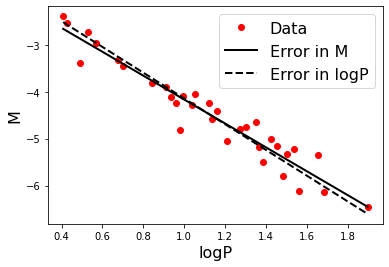

In [7]:
fontsize = 16
linewidth = 2

x = np.array([logP[0], logP[-1]]) #for the relation

y_M = a0 + a1*x #error in M
y_P = -b0/b1 + x/b1 #error in logP

fig_ceph, ax = plt.subplots()

ax.plot(logP, M, 'ro', label = 'Data')
ax.plot(x, y_M, 'k', label = 'Error in M', lw = linewidth)
ax.plot(x, y_P, 'k--', label = 'Error in logP', lw = linewidth)

ax.set_xlabel('logP', fontsize = fontsize)
ax.set_ylabel('M', fontsize = fontsize)

ax.legend(fontsize = fontsize)

plt.show()

</div>